In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dcancer = pd.read_csv('data_cancer2.csv', sep=',')

In [3]:
dcancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
dcancer.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
dcancer.shape

(569, 33)

In [6]:
dcancer.dropna(axis=1, inplace=True)

In [7]:
dcancer.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
dcancer.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [9]:
dcancer['diagnosis'] = dcancer['diagnosis'].map({'M' : 1 , 'B' : 0})

In [10]:
dcancer.dtypes

id                           int64
diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [11]:
#verificado que o id não vai fazer tante diferença no resultado, então ele vai ser dropado

In [12]:
dcancer.drop(axis = 1, columns='id', inplace=True)

In [13]:
dcancer

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [14]:
dcancer.shape

(569, 31)

In [15]:
previsores = dcancer.iloc[:,1:32].values

In [16]:
previsores

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [17]:
alvo = dcancer['diagnosis'].values

In [18]:
alvo

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [19]:
previsores_esc = StandardScaler().fit_transform(previsores)

In [20]:
previsores_esc

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [21]:
dcancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
#reduzir dimensionalidade 

In [23]:
pca = PCA(n_components=10)

In [24]:
previsores_esc_pca = pca.fit_transform(previsores_esc)

In [25]:
previsores_pca = pca.fit_transform(previsores)

In [26]:
previsores_esc_pca.shape

(569, 10)

In [27]:
previsores_pca.shape

(569, 10)

In [28]:
pca.explained_variance_ratio_

array([9.82044672e-01, 1.61764899e-02, 1.55751075e-03, 1.20931964e-04,
       8.82724536e-05, 6.64883951e-06, 4.01713682e-06, 8.22017197e-07,
       3.44135279e-07, 1.86018721e-07])

In [29]:
pca.explained_variance_ratio_.sum() # importância das variáveis mais relevantes

0.9999998946838424

In [30]:
x_train_esc, x_test_esc, y_train_esc, y_test_esc = train_test_split(previsores_esc_pca,alvo,test_size=0.3,random_state=0)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(previsores_pca,alvo,test_size=0.3,random_state=0)

In [32]:
naive = GaussianNB()

In [33]:
naive.fit(x_train,y_train)
# Análise e treinamento
previsoes_naive = naive.predict(x_test)
ac_naive = accuracy_score(y_test, previsoes_naive)
# Verificar se tem overfitting ou não
previsoes_naive_treino = naive.predict(x_train)
ac_naive_treino = accuracy_score(y_train, previsoes_naive_treino)

In [34]:
naive.fit(x_train_esc,y_train_esc)

# Análise e treinamento
previsoes_naive_esc = naive.predict(x_test_esc)
ac_naive_esc = accuracy_score(y_test_esc, previsoes_naive_esc)

# Verificar se tem overfitting ou não

previsoes_naive_treino_esc = naive.predict(x_train_esc)
ac_naive_treino_esc = accuracy_score(y_train_esc, previsoes_naive_treino_esc)

In [35]:
print(f'Acurácia, utilizando Naive Bayes : {round(ac_naive,3)*100}% e na base de treino : {round(ac_naive_treino,3)*100}%')

print(f'Acurácia, utilizando Naive Bayes, com a base de dados escalonada : {round(ac_naive_esc,3)*100}% e na base de treino : {round(ac_naive_treino_esc,3)*100}%')

Acurácia, utilizando Naive Bayes : 91.2% e na base de treino : 89.7%
Acurácia, utilizando Naive Bayes, com a base de dados escalonada : 91.2% e na base de treino : 92.7%


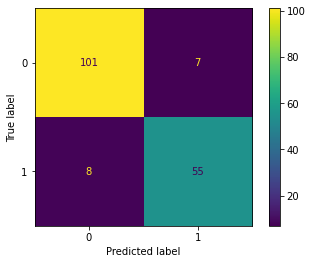

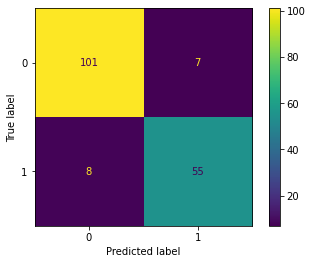

In [36]:
#Sem escalonamento
ConfusionMatrixDisplay.from_predictions(y_test,previsoes_naive)
# Com escalonamento
ConfusionMatrixDisplay.from_predictions(y_test_esc,previsoes_naive_esc)

In [37]:
# Validação Cruzada

# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

#Criando o modelo
modelo = naive
resultado = cross_val_score(modelo, previsores_esc_pca, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média Escalonada: %.2f%%" % (resultado.mean() * 100.0))


Acurácia Média Escalonada: 91.20%


In [38]:
# Validação Cruzada

# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

#Criando o modelo
modelo = naive
resultado = cross_val_score(modelo, previsores_pca, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média sem Escaloamento: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média sem Escaloamento: 89.94%


In [39]:
svm = SVC(kernel='rbf', random_state=1, C = 2)
svm.fit(x_train,y_train)


SVC(C=2, random_state=1)

In [40]:
# Análise e treinamento

previsoes_svc = svm.predict(x_test)
ac_svc = accuracy_score(y_test, previsoes_svc)

# Verificar se tem overfitting ou não

previsoes_svc_treino = svm.predict(x_train)
ac_svc_treino = accuracy_score(y_train, previsoes_svc_treino)

In [41]:
svm.fit(x_train_esc,y_train_esc)

SVC(C=2, random_state=1)

In [42]:
# Análise e treinamento

previsoes_svc_esc = svm.predict(x_test_esc)
ac_svc_esc = accuracy_score(y_test_esc, previsoes_svc_esc)

# Verificar se tem overfitting ou não

previsoes_svc_treino_esc = svm.predict(x_train_esc)
ac_svc_treino_esc = accuracy_score(y_train_esc, previsoes_svc_treino_esc)

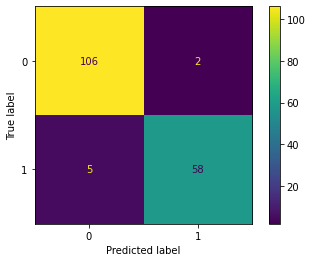

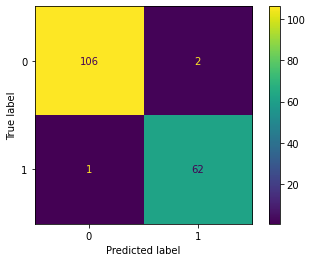

In [43]:
#Sem escalonamento
ConfusionMatrixDisplay.from_predictions(y_test,previsoes_svc)
# Com escalonamento
ConfusionMatrixDisplay.from_predictions(y_test_esc,previsoes_svc_esc)

In [44]:
print(f'Acurácia, utilizando Máquinas de Vetores de Suporte : {round(ac_svc,3)*100}% e na base de treino : {round(ac_svc_treino,3)*100}%')

print(f'Acurácia, utilizando Máquinas de Vetores de Suporte, com a base de dados escalonada : {round(ac_svc_esc,3)*100}% e na base de treino : {round(ac_svc_treino_esc,3)*100}%')

Acurácia, utilizando Máquinas de Vetores de Suporte : 95.89999999999999% e na base de treino : 91.2%
Acurácia, utilizando Máquinas de Vetores de Suporte, com a base de dados escalonada : 98.2% e na base de treino : 98.7%


In [45]:
# Validação Cruzada

# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

#Criando o modelo
modelo = SVC(kernel='rbf', random_state=1, C = 2)
resultado = cross_val_score(modelo, previsores_pca, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média sem Escaloamento: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média sem Escaloamento: 92.24%


In [46]:
# Validação Cruzada

# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

#Criando o modelo
modelo = SVC(kernel='rbf', random_state=1, C = 2)
resultado = cross_val_score(modelo, previsores_esc_pca, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média com Escaloamento: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média com Escaloamento: 97.52%


In [47]:
logistica = LogisticRegression(random_state=1)

In [48]:
logistica.fit(x_train,y_train)

/home/lucas/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [49]:
# Análise e treinamento

previsoes_logistica = logistica.predict(x_test)
ac_logistica = accuracy_score(y_test, previsoes_logistica)


# Verificar se tem overfitting ou não

previsoes_logistica_treino = logistica.predict(x_train)
ac_logistica_treino = accuracy_score(y_train, previsoes_logistica_treino)

In [50]:
logistica.fit(x_train_esc,y_train_esc)

LogisticRegression(random_state=1)

In [51]:
# Análise e treinamento
previsoes_logistica_esc = logistica.predict(x_test_esc)
ac_logistica_esc = accuracy_score(y_test_esc, previsoes_logistica_esc)

# Verificar se tem overfitting ou não

previsoes_logistica_treino_esc = naive.predict(x_train_esc)
ac_logistica_treino_esc = accuracy_score(y_train_esc, previsoes_logistica_treino_esc)

In [52]:
print(f'Acurácia, utilizando Regressão Logística : {round(ac_logistica,3)*100}% e na base de treino : {round(ac_logistica_treino,3)*100}%')

print(f'Acurácia, utilizando Regressão Logística, com a base de dados escalonada : {round(ac_logistica_esc,3)*100}% e na base de treino : {round(ac_logistica_treino_esc,3)*100}%')

Acurácia, utilizando Regressão Logística : 95.89999999999999% e na base de treino : 95.7%
Acurácia, utilizando Regressão Logística, com a base de dados escalonada : 95.89999999999999% e na base de treino : 92.7%


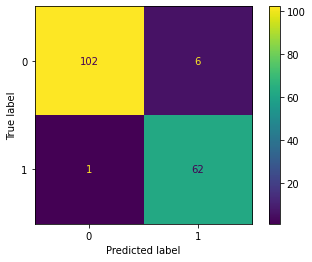

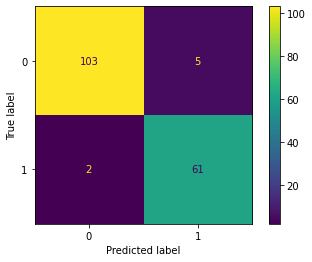

In [53]:
#Sem escalonamento
ConfusionMatrixDisplay.from_predictions(y_test,previsoes_logistica)
# Com escalonamento
ConfusionMatrixDisplay.from_predictions(y_test_esc,previsoes_logistica_esc)

In [54]:
# Validação Cruzada

# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

#Criando o modelo
modelo = LogisticRegression(random_state=1)
resultado = cross_val_score(modelo, previsores_pca, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média sem escalonamento: %.2f%%" % (resultado.mean() * 100.0))

/home/lucas/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/lucas/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/lucas/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/lucas/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

Acurácia Média sem escalonamento: 94.87%


/home/lucas/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/lucas/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [55]:
# Validação Cruzada

# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

#Criando o modelo
modelo = LogisticRegression(random_state=1)
resultado = cross_val_score(modelo, previsores_esc_pca, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média com escalonamento: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média com escalonamento: 97.70%


In [56]:
knn = KNeighborsClassifier()

In [57]:
knn.fit(x_train,y_train)

# Análise e treinamento

previsoes_knn = knn.predict(x_test)
ac_knn = accuracy_score(y_test, previsoes_knn)


# Verificar se tem overfitting ou não

previsoes_knn_treino = knn.predict(x_train)
ac_knn_treino = accuracy_score(y_train, previsoes_knn_treino)


In [58]:
knn.fit(x_train_esc,y_train_esc)

# Análise e treinamento
previsoes_knn_esc = knn.predict(x_test_esc)
ac_knn_esc = accuracy_score(y_test_esc, previsoes_knn_esc)

# Verificar se tem overfitting ou não

previsoes_knn_treino_esc = naive.predict(x_train_esc)
ac_knn_treino_esc = accuracy_score(y_train_esc, previsoes_knn_treino_esc)

In [59]:
print(f'Acurácia, utilizando Aprendizagem Baseada em Instâncias : {round(ac_knn,3)*100}% e na base de treino : {round(ac_knn_treino,3)*100}%')

print(f'Acurácia, utilizando Aprendizagem Baseada em Instâncias, com a base de dados escalonada : {round(ac_knn_esc,3)*100}% e na base de treino : {round(ac_knn_treino_esc,3)*100}%')

Acurácia, utilizando Aprendizagem Baseada em Instâncias : 94.69999999999999% e na base de treino : 94.0%
Acurácia, utilizando Aprendizagem Baseada em Instâncias, com a base de dados escalonada : 96.5% e na base de treino : 92.7%


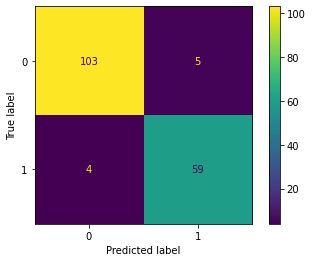

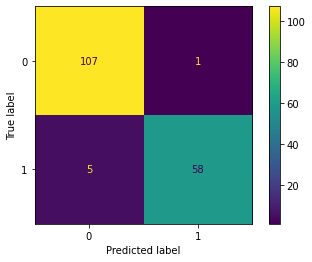

In [60]:
#Sem escalonamento
ConfusionMatrixDisplay.from_predictions(y_test,previsoes_knn)
# Com escalonamento
ConfusionMatrixDisplay.from_predictions(y_test_esc,previsoes_knn_esc)

In [61]:
# Validação Cruzada

# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

#Criando o modelo
modelo = KNeighborsClassifier()
resultado = cross_val_score(modelo, previsores_pca, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média sem escalonamento: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média sem escalonamento: 93.13%


In [62]:
# Validação Cruzada

# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

#Criando o modelo
modelo = KNeighborsClassifier()
resultado = cross_val_score(modelo, previsores_esc_pca, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média com escalonamento: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média com escalonamento: 97.00%


In [63]:
arvore = DecisionTreeClassifier(max_depth=5)

In [64]:
arvore.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [65]:
# Análise e treinamento

previsoes_arvore = arvore.predict(x_test)
ac_arvore = accuracy_score(y_test, previsoes_arvore)


# Verificar se tem overfitting ou não

previsoes_arvore_treino = arvore.predict(x_train)
ac_arvore_treino = accuracy_score(y_train, previsoes_arvore_treino)


In [66]:
arvore.fit(x_train_esc,y_train_esc)

DecisionTreeClassifier(max_depth=5)

In [67]:
# Análise e treinamento
previsoes_arvore_esc = arvore.predict(x_test_esc)
ac_arvore_esc = accuracy_score(y_test_esc, previsoes_arvore_esc)

# Verificar se tem overfitting ou não

previsoes_arvore_treino_esc = naive.predict(x_train_esc)
ac_arvore_treino_esc = accuracy_score(y_train_esc, previsoes_arvore_treino_esc)

In [68]:
print(f'Acurácia, utilizando Aprendizagem Baseada em Instâncias : {round(ac_arvore,3)*100}% e na base de treino : {round(ac_arvore_treino,3)*100}%')

print(f'Acurácia, utilizando Aprendizagem Baseada em Instâncias, com a base de dados escalonada : {round(ac_arvore_esc,3)*100}% e na base de treino : {round(ac_arvore_treino_esc,3)*100}%')

Acurácia, utilizando Aprendizagem Baseada em Instâncias : 93.0% e na base de treino : 97.7%
Acurácia, utilizando Aprendizagem Baseada em Instâncias, com a base de dados escalonada : 90.10000000000001% e na base de treino : 92.7%


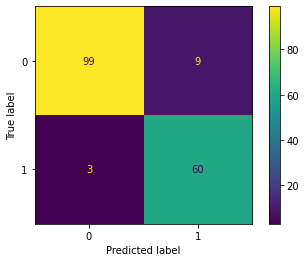

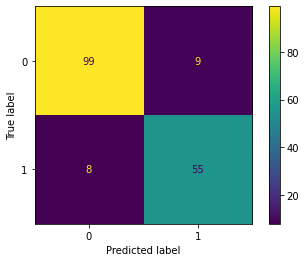

In [69]:
#Sem escalonamento
ConfusionMatrixDisplay.from_predictions(y_test,previsoes_arvore)
# Com escalonamento
ConfusionMatrixDisplay.from_predictions(y_test_esc,previsoes_arvore_esc)

In [70]:
# Validação Cruzada

# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

#Criando o modelo
modelo = DecisionTreeClassifier(max_depth=5)
resultado = cross_val_score(modelo, previsores_pca, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média sem escalonamento: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média sem escalonamento: 92.60%


In [71]:
# Validação Cruzada

# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

#Criando o modelo
modelo = DecisionTreeClassifier(max_depth=5)
resultado = cross_val_score(modelo, previsores_esc_pca, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média com escalonamento: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média com escalonamento: 95.23%


In [72]:
random = RandomForestClassifier(n_estimators=40)

In [73]:
random.fit(x_train,y_train)

RandomForestClassifier(n_estimators=40)

In [74]:
# Análise e treinamento

previsoes_random = random.predict(x_test)
ac_random = accuracy_score(y_test, previsoes_random)


# Verificar se tem overfitting ou não

previsoes_random_treino = random.predict(x_train)
ac_random_treino = accuracy_score(y_train, previsoes_random_treino)

In [75]:
random.fit(x_train_esc,y_train_esc)

RandomForestClassifier(n_estimators=40)

In [76]:
# Análise e treinamento
previsoes_random_esc = random.predict(x_test_esc)
ac_random_esc = accuracy_score(y_test_esc, previsoes_random_esc)

# Verificar se tem overfitting ou não

previsoes_random_treino_esc = naive.predict(x_train_esc)
ac_random_treino_esc = accuracy_score(y_train_esc, previsoes_random_treino_esc)

In [77]:
print(f'Acurácia, utilizando Floresta Radômica : {round(ac_random,3)*100}% e na base de treino : {round(ac_random_treino,3)*100}%')

print(f'Acurácia, utilizando Floresta Radômica, com a base de dados escalonada : {round(ac_random_esc,3)*100}% e na base de treino : {round(ac_random_treino_esc,3)*100}%')

Acurácia, utilizando Floresta Radômica : 95.3% e na base de treino : 100.0%
Acurácia, utilizando Floresta Radômica, com a base de dados escalonada : 93.60000000000001% e na base de treino : 92.7%


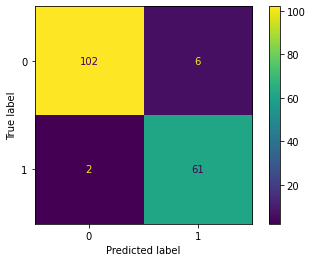

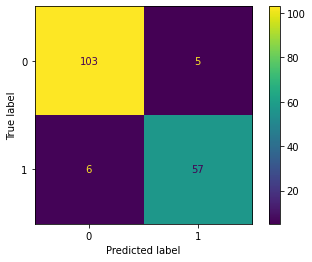

In [78]:
#Sem escalonamento
ConfusionMatrixDisplay.from_predictions(y_test,previsoes_random)
# Com escalonamento
ConfusionMatrixDisplay.from_predictions(y_test_esc,previsoes_random_esc)

In [79]:
# Validação Cruzada

# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

#Criando o modelo
modelo = RandomForestClassifier(n_estimators=40)
resultado = cross_val_score(modelo, previsores_pca, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média sem escalonamento: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média sem escalonamento: 94.88%


In [80]:
# Validação Cruzada

# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

#Criando o modelo
modelo = RandomForestClassifier(n_estimators=40)
resultado = cross_val_score(modelo, previsores_esc_pca, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média com escalonamento: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média com escalonamento: 95.42%


In [81]:
xg = XGBClassifier(max_depth=3, n_estimators=50)

In [82]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [83]:
# Análise e treinamento

previsoes_xg = xg.predict(x_test)
ac_xg = accuracy_score(y_test, previsoes_xg)


# Verificar se tem overfitting ou não

previsoes_xg_treino = xg.predict(x_train)
ac_xg_treino = accuracy_score(y_train, previsoes_xg_treino)


In [84]:
xg.fit(x_train_esc,y_train_esc)

# Análise e treinamento
previsoes_xg_esc = xg.predict(x_test_esc)
ac_xg_esc = accuracy_score(y_test_esc, previsoes_xg_esc)

# Verificar se tem overfitting ou não

previsoes_xg_treino_esc = naive.predict(x_train_esc)
ac_xg_treino_esc = accuracy_score(y_train_esc, previsoes_xg_treino_esc)


In [85]:
print(f'Acurácia, utilizando XGBOOST : {round(ac_xg,3)*100}% e na base de treino : {round(ac_xg_treino,3)*100}%')

print(f'Acurácia, utilizando XGBOOST, com a base de dados escalonada : {round(ac_xg_esc,3)*100}% e na base de treino : {round(ac_xg_treino_esc,3)*100}%')


Acurácia, utilizando XGBOOST : 95.3% e na base de treino : 100.0%
Acurácia, utilizando XGBOOST, com a base de dados escalonada : 93.0% e na base de treino : 92.7%


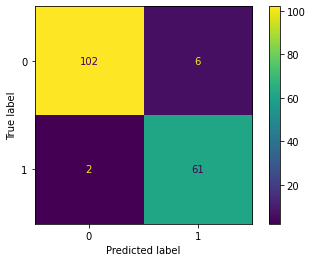

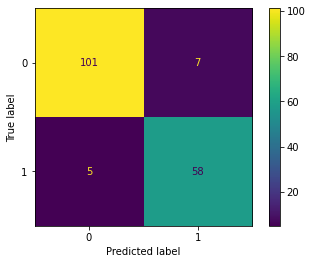

In [86]:
#Sem escalonamento
ConfusionMatrixDisplay.from_predictions(y_test,previsoes_xg)
# Com escalonamento
ConfusionMatrixDisplay.from_predictions(y_test_esc,previsoes_xg_esc)

In [87]:
# Validação Cruzada

# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

#Criando o modelo
modelo = XGBClassifier(max_depth=3, n_estimators=50)
resultado = cross_val_score(modelo, previsores_pca, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média sem escalonamento: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média sem escalonamento: 94.36%


In [88]:
# Validação Cruzada

# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

#Criando o modelo
modelo = XGBClassifier(max_depth=3, n_estimators=50)
resultado = cross_val_score(modelo, previsores_esc_pca, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média com escalonamento: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média com escalonamento: 96.46%


In [89]:
#Light Boost

# Dataset para treino
dataset = lgb.Dataset(x_train,label=y_train)

In [90]:
# Parâmetros
parametros = {'num_leaves':300, # número de folhas
              'objective':'binary', # classificação Binária
              'max_depth':3,
              'learning_rate':.05,
              'max_bin':100}

In [91]:
lgbm=lgb.train(parametros,dataset,num_boost_round=200)

[LightGBM] [Info] Number of positive: 149, number of negative: 249
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.374372 -> initscore=-0.513507
[LightGBM] [Info] Start training from score -0.513507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [92]:
previsoes_lgbm = lgbm.predict(x_test)

In [93]:
previsoes_lgbm_treino = lgbm.predict(x_train)

In [94]:
# Quando for menor que 5 considera 0 e quando for maior ou igual a 5 considera 1
for i in range(0, 171):
    if previsoes_lgbm[i] >= .5:
       previsoes_lgbm[i] = 1
    else:
       previsoes_lgbm[i] = 0

In [95]:
# Quando for menor que 5 considera 0 e quando for maior ou igual a 5 considera 1
for i in range(0, 171):
    if previsoes_lgbm_treino[i] >= .5:
       previsoes_lgbm_treino[i] = 1
    else:
       previsoes_lgbm_treino[i] = 0

In [96]:
ac_lgbm = accuracy_score(y_test,previsoes_lgbm)

In [97]:
#ac_lgbm_treino = accuracy_score(y_train,previsoes_lgbm_treino)# não sei pq, mas não deu certo

In [98]:
print(f'Acurácia, utilizando LightBoost : {round(ac_lgbm,3)*100}%') 

Acurácia, utilizando LightBoost : 95.3%


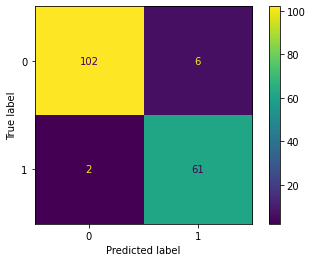

In [99]:
#Sem escalonamento
ConfusionMatrixDisplay.from_predictions(y_test,previsoes_lgbm)

In [100]:
# Validação Cruzada

# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

#Criando o modelo
modelo = lgb.LGBMClassifier(num_leaves = 300, objective = 'binary',
                            max_depth = 2, learning_rate = .05, max_bin =10)
resultado = cross_val_score(modelo, previsores_pca, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média sem escalonamento: %.2f%%" % (resultado.mean() * 100.0))

[LightGBM] [Info] Number of positive: 209, number of negative: 341
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000094 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 100
[LightGBM] [Info] Number of data points in the train set: 550, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.380000 -> initscore=-0.489548
[LightGBM] [Info] Start training from score -0.489548
[LightGBM] [Info] Number of positive: 203, number of negative: 347
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000094 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 100
[LightGBM] [Info] Number of data points in the train set: 550, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369091 -> initscore=-0.536119
[LightGBM] [Info] Start training from score -0.536119
[LightGBM] [Info] Nu

Acurácia Média sem escalonamento: 95.24%


-----------------------------------------------------------------------------------------------------
Naive Bayes

Acurácia, utilizando Naive Bayes : 91.2% e na base de treino : 89.7%

(MELHOR)Acurácia, utilizando Naive Bayes, com a base de dados escalonada : 91.2% e na base de treino : 92.7%
- 91.2


-----------------------------------------------------------------------------------------------------
***SVM*** Algoritimo Vencedor

Acurácia, utilizando Máquinas de Vetores de Suporte : 95.89999999999999% e na base de treino : 91.2%

(MELHOR)Acurácia, utilizando Máquinas de Vetores de Suporte, com a base de dados escalonada : 98.2% e na base de treino : 98.7%
-----------------------------------------------------------------------------------------------------
-98.2


-----------------------------------------------------------------------------------------------------
Regressão Logística

(MELHOR)Acurácia, utilizando Regressão Logística : 95.89999999999999% e na base de treino : 95.7%

Acurácia, utilizando Regressão Logística, com a base de dados escalonada : 95.89999999999999% 
e na base de treino : 92.7%
- 95.9


-----------------------------------------------------------------------------------------------------
KNN

Acurácia, utilizando Aprendizagem Baseada em Instâncias : 94.69999999999999% e na base de treino : 94.0%

(MELHOR) Acurácia, utilizando Aprendizagem Baseada em Instâncias, com a base de dados escalonada : 96.5% e na base de treino : 92.7%
- 96.5


-----------------------------------------------------------------------------------------------------
Árvores de Classificação

(MELHOR) Acurácia, utilizando Árvores de Classificação: 93.60000000000001% e na base de treino : 97.7%

Acurácia, utilizando Árvores de Classificação, com a base de dados escalonada : 90.10000000000001% e na base de treino : 92.7%

- 97.7


-----------------------------------------------------------------------------------------------------
Floresta Randômica

(MELHOR)Acurácia, utilizando Floresta Radômica : 97.7% e na base de treino : 100.0%

Acurácia, utilizando Floresta Radômica, com a base de dados escalonada : 92.4% e na base de treino : 92.7%

- 97.7



-----------------------------------------------------------------------------------------------------
XGBOOST

(MELHOR)Acurácia, utilizando XGBOOST : 95.3% e na base de treino : 100.0%

Acurácia, utilizando XGBOOST, com a base de dados escalonada : 93.0% e na base de treino : 92.7%

OBS: Não é a melhor Acurácia, mas snao as mais ŕoximas da base de teste com a base de treino.


- 95.3


-----------------------------------------------------------------------------------------------------
LightBoost

Acurácia, utilizando LightBoost : 95.3%



In [101]:
np.savetxt('previsores.csv', previsores_esc, delimiter=',')

In [102]:
np.savetxt('alvo.csv', alvo, delimiter=',')

In [103]:
# Criando o algoritmo - para hiperparametros
gbm = GradientBoostingClassifier()

In [104]:
# Determinando o espaço do hiperparâmetro
param_grid = dict(
    n_estimators=[20, 40, 50, 100, 250],
    learning_rate=[0.05, 0.1, 0.5],
    max_depth=[12,3,4,5],
    )

In [105]:
# Configurando a procura com o Grid search
grid_search = GridSearchCV(gbm, param_grid, scoring='roc_auc', cv=4)

In [106]:
#Configurando os melhores hiperparâmetros
grid_search.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.1, 0.5],
                         'max_depth': [12, 3, 4, 5],
                         'n_estimators': [20, 40, 50, 100, 250]},
             scoring='roc_auc')

In [107]:
# Relação dos dados para todos os modelos

resultado = pd.DataFrame(grid_search.cv_results_)
print(resultado.shape)
resultado.head(3)

(60, 15)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.059041,0.005587,0.002319,0.000224,0.05,12,20,"{'learning_rate': 0.05, 'max_depth': 12, 'n_es...",0.934792,0.901740,0.966870,0.933522,0.934231,0.023031,51
1,0.118344,0.007370,0.002287,0.000122,0.05,12,40,"{'learning_rate': 0.05, 'max_depth': 12, 'n_es...",0.906049,0.889643,0.972537,0.950087,0.929579,0.033221,53
2,0.144392,0.018343,0.002567,0.000140,0.05,12,50,"{'learning_rate': 0.05, 'max_depth': 12, 'n_es...",0.808451,0.890280,0.972973,0.949869,0.905393,0.063583,59


In [108]:
# Ordenando os melhores resultados
resultado.sort_values(by='mean_test_score', ascending=False, inplace=True)

resultado.reset_index(drop=True, inplace=True)

resultado[['param_max_depth', 'param_learning_rate', 'param_n_estimators',
    'mean_test_score', 'std_test_score']].head()

,param_max_depth,param_learning_rate,param_n_estimators,mean_test_score,std_test_score
0,3,0.5,250,0.985998,0.013037
1,4,0.5,100,0.985594,0.015300
2,3,0.5,100,0.985470,0.014190
3,4,0.05,250,0.985157,0.014817
4,4,0.5,20,0.985007,0.015306
